<a href="https://colab.research.google.com/github/khonkaen-iot/defect-detection/blob/main/YOLO_objectdetection_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#0.Recap


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 11.0 MB/s eta 0:00:00


In [2]:
import ultralytics

In [3]:
ultralytics.checks()

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [4]:
!nvidia-smi

Wed Jul 19 15:08:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Run simple prediction on picture

In [5]:
#Run inferance
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 6.23M/6.23M [00:00<00:00, 85.4MB/s]
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 165k/165k [00:00<00:00, 6.03MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 127.5ms
Speed: 14.8ms preprocess, 127.5ms inference, 522.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


###CLI Basic
If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [6]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://youtu.be/Zgi9g1ksQHc'

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

requirements: Ultralytics requirements ['pafy', 'youtube_dl==2020.12.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.7s, installed 2 packages: ['pafy', 'youtube_dl==2020.12.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://youtu.be/Zgi9g1ksQHc... Success ✅ (6557 frames of shape 1280x676 at 24.00 FPS)

0: 352x640 (no detections), 447.0ms
0: 352x640 (no detections), 12.4ms
0: 352x640 (no detections), 6.2ms
0: 352x640 (no detections), 9.2ms
0: 352x640 (no detections), 9.4ms
0: 352x640 (no detections), 6.5ms
0: 352x640 (no detections), 8.8ms
0: 352x640 (no detections), 8.6ms
0: 352x640 (no detections), 8.0ms
0: 352x640 (no detections), 8.4ms
0: 352x640 (no detections), 8.6ms
0: 352x6

In [7]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

100% 22.8M/22.8M [00:00<00:00, 153MB/s] 
Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 82.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 240.0ms
Speed: 3.6ms preprocess, 240.0ms inference, 337.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict


In [8]:
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/zidane.jpg'

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

image 1/1 /content/zidane.jpg: 384x640 3 persons, 2 ties, 415.7ms
Speed: 2.6ms preprocess, 415.7ms inference, 363.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2


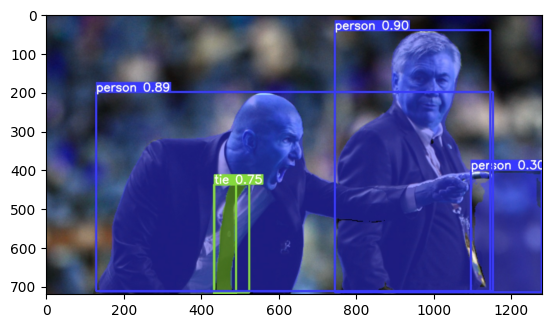

In [9]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/runs/segment/predict2/zidane.jpg')
plt.imshow(img)
plt.show()


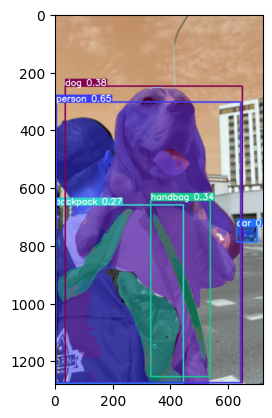

In [10]:
img = cv2.imread('/content/runs/segment/predict/dog.jpeg')
plt.imshow(img)
plt.show()

###  Val
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [11]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip


100%|██████████| 780M/780M [00:06<00:00, 125MB/s]


In [12]:
# Validate YOLOv8n on COCO128 val
!yolo val model=yolov8n.pt data=coco128.yaml

Ultralytics YOLOv8.0.137 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Dataset 'coco128.yaml' images not found ⚠️, missing paths ['/content/datasets/coco128/images/train2017']
100% 6.66M/6.66M [00:00<00:00, 85.2MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets...
Dataset download success ✅ (0.5s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 13.4MB/s]
val: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 1848.85it/s]
val: New cache created: /content/datasets/coco128/labels/train2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:07<00:00,  1.03it/s]
                   all        128        929       0.64      0.537      0.605      0.446
                person        128        254      0.797      0.677      0.764      0.538
               bi

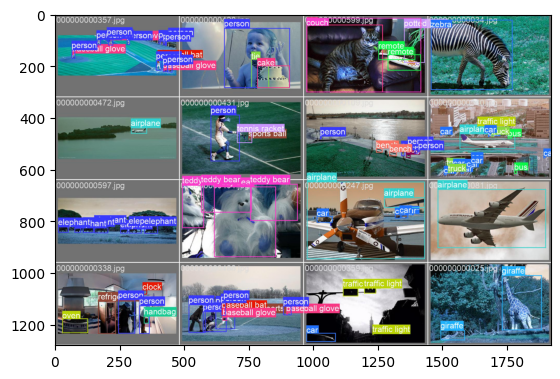

In [13]:
img = cv2.imread('/content/runs/detect/val/val_batch0_labels.jpg')
plt.imshow(img)
plt.show()

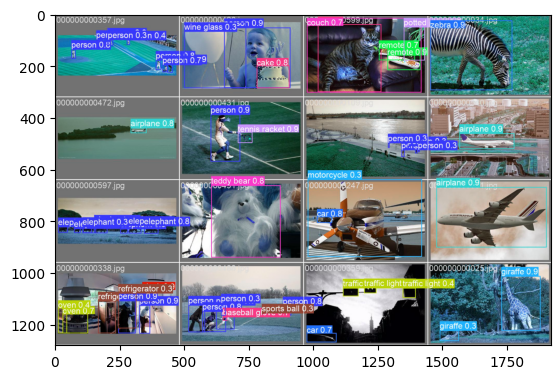

In [14]:
img = cv2.imread('/content/runs/detect/val/val_batch0_pred.jpg')
plt.imshow(img)
plt.show()

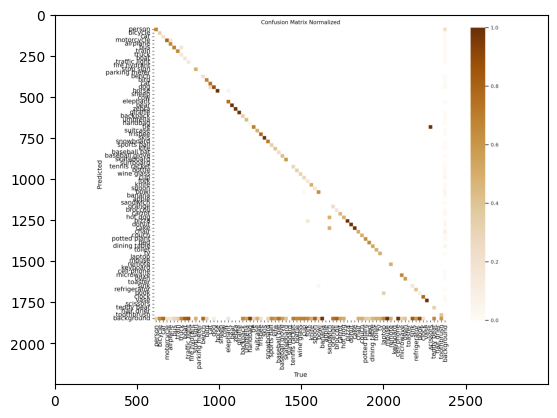

In [15]:
img = cv2.imread('/content/runs/detect/val/confusion_matrix_normalized.png')
plt.imshow(img)
plt.show()

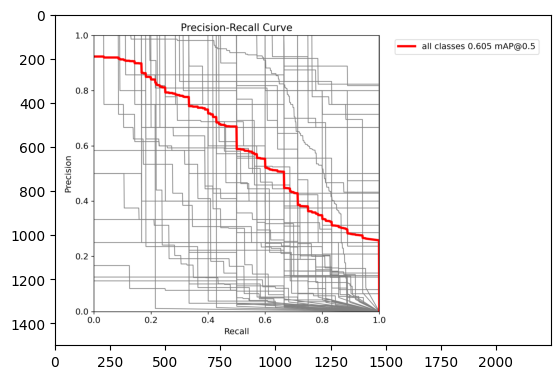

In [16]:
img = cv2.imread('/content/runs/detect/val/PR_curve.png')
plt.imshow(img)
plt.show()

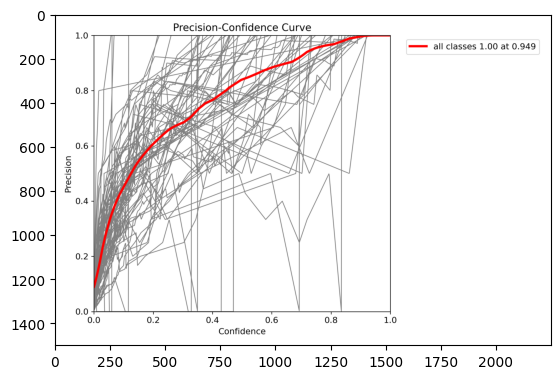

In [17]:
img = cv2.imread('/content/runs/detect/val/P_curve.png')
plt.imshow(img)
plt.show()

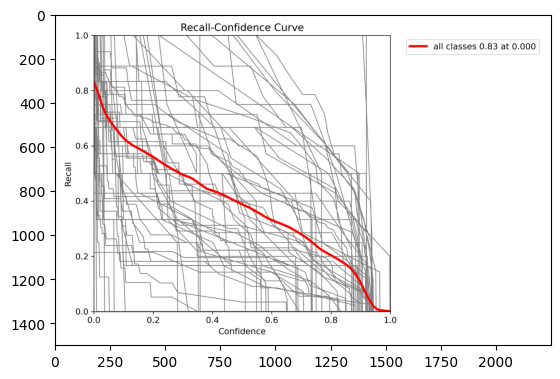

In [18]:
img = cv2.imread('/content/runs/detect/val/R_curve.png')
plt.imshow(img)
plt.show()